#                                       DATA SCIENCE PROJECT-3

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#Import the Data to a pandas Datafram
#Import Train Data
traindata = pd.read_csv(r"data\adult.data",
                   names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])

#Import Test Data
testdata= pd.read_csv(r"data\adult.test",
                   names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])



In [3]:
#Append the test and train dataset to one
data = traindata.append(testdata)
#View the data
data.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
print("Total Dataset:", data.shape[0])

Total Dataset: 48843


In [5]:
# Lets Analyze the Data
data.label.unique() # Looking at the result below there are labels which are inconsistent. - It has to be corrected

array([' <=50K', ' >50K', nan, ' <=50K.', ' >50K.'], dtype=object)

In [6]:
#replace function of the Pandas is used to correct and make the values consistent
data['label']= data['label'].replace(' <=50K.', ' <=50K')
data['label']=data['label'].replace(' >50K.', ' >50K')
data.label.unique() #now the values are consistent

array([' <=50K', ' >50K', nan], dtype=object)

In [7]:
#from the above results we still see that there is nan value, lets remove it as the dataset without unknow label is not necessary
data = data.dropna()
print("Total Dataset after removing nan:", data.shape[0])

Total Dataset after removing nan: 48842


In [8]:
#Although the Dataset description says the Age is continuous, there are numbers stores as string see below results
data.Age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, '25', '38', '28', '44', '18', '34', '29', '63',
       '24', '55', '65', '36', '26', '58', '48', '43', '20', '37', '40',
       '72', '45', '22', '23', '54', '32', '46', '56', '17', '39', '52',
       '21', '42', '33', '30', '47', '41', '19', '69', '50', '31', '59',
       '49', '51', '27', '57', '61', '64', '79', '73', '53', '77', '80',
       '62', '35', '68', '66', '75', '60', '67', '71', '70', '90', '81',
       '74', '78', '82', '83', '85', '76', '84', '89', '88', '87'], dtype=object)

In [9]:
#lets connvert to number and see the result and datatype
data['Age'] = data['Age'].apply(pd.to_numeric)
data.Age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

In [10]:
#Lets Visualize the Data

In [11]:
# Use of Pivot function with aggregate function length to get the grouped data with field 'sex' againts for each label
pivot_sex_df = data.pivot_table(index='sex',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)
pivot_sex_df_percent = pivot_sex_df.div( pivot_sex_df.iloc[:,-1], axis=0 )
pivot_sex_df_percent.iloc[:-1,:-1]

label,<=50K,>50K
sex,,
Female,0.890749,0.109251
Male,0.696233,0.303767


[Text(0,0.5,'Percentage%'), Text(0.5,0,'Sex')]

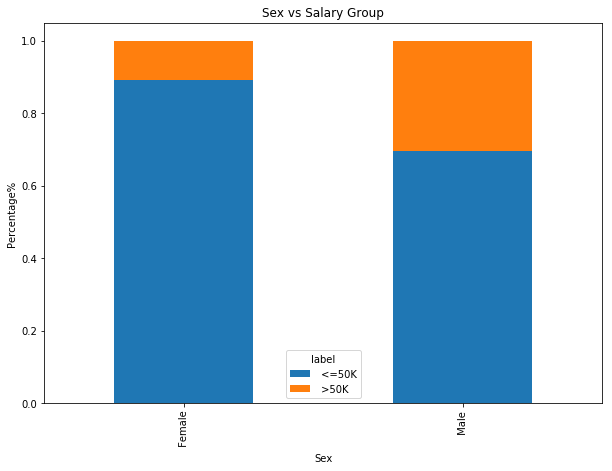

In [12]:
#Plot the Data
plot1= pivot_sex_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7), 
                                            title = "Sex vs Salary Group")
plot1.set(xlabel="Sex", ylabel="Percentage%")


In [13]:
#Obervation from the above is % of males having Salary above 50K is more compared to Female

In [14]:
pivot_race_df = data.pivot_table(index='race',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)


In [15]:
pivot_race_df_percent = pivot_race_df.div( pivot_race_df.iloc[:,-1], axis=0 )


In [16]:
pivot_race_df_percent.iloc[:-1,:-1]

label,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.882979,0.117021
Asian-Pac-Islander,0.730744,0.269256
Black,0.879189,0.120811
Other,0.876847,0.123153
White,0.746013,0.253987


[Text(0,0.5,'Percentage%'), Text(0.5,0,'Race')]

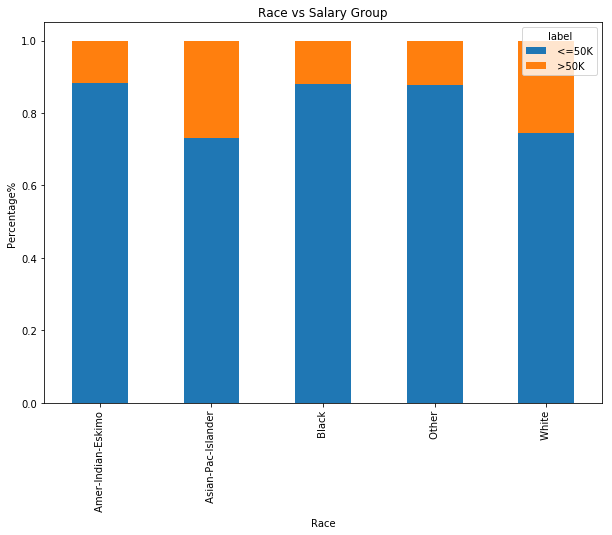

In [17]:
plot2 = pivot_race_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7),title = "Race vs Salary Group")
plot2.set(xlabel="Race", ylabel="Percentage%")

In [18]:
#From the above we can see that People of Asian-Pac_Islander and White get salary more than 50K

In [19]:
pivot_relationship_df = data.pivot_table(index='relationship',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)


In [20]:
pivot_relationship_df_percent = pivot_relationship_df.div( pivot_relationship_df.iloc[:,-1], axis=0 )


In [21]:
pivot_relationship_df_percent.iloc[:-1,:-1]

label,<=50K,>50K
relationship,,
Husband,0.551329,0.448671
Not-in-family,0.898593,0.101407
Other-relative,0.965471,0.034529
Own-child,0.985358,0.014642
Unmarried,0.939707,0.060293
Wife,0.531103,0.468897


[Text(0,0.5,'Percentage%'), Text(0.5,0,'Relationship')]

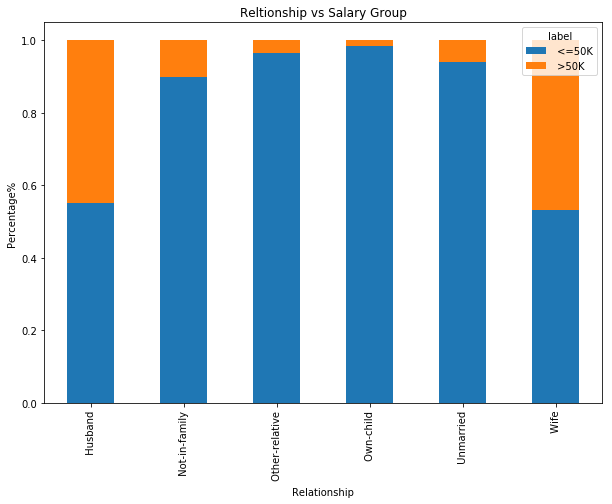

In [22]:
plot3= pivot_relationship_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7),title = "Reltionship vs Salary Group")
plot3.set(xlabel="Relationship", ylabel="Percentage%")

In [23]:
#From the above its clear that relationship of Husband and Wife dominate in having salary more than 50K

In [24]:
pivot_ms_df = data.pivot_table(index='marital_status',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)


In [25]:
pivot_ms_dff_percent = pivot_ms_df.div( pivot_ms_df.iloc[:,-1], axis=0 )


In [26]:
pivot_ms_dff_percent.iloc[:-1,:-1]

label,<=50K,>50K
marital_status,,
Divorced,0.898839,0.101161
Married-AF-spouse,0.621622,0.378378
Married-civ-spouse,0.553867,0.446133
Married-spouse-absent,0.907643,0.092357
Never-married,0.954520,0.045480
Separated,0.935294,0.064706
Widowed,0.915679,0.084321


[Text(0,0.5,'Percentage%'), Text(0.5,0,'Marital Status')]

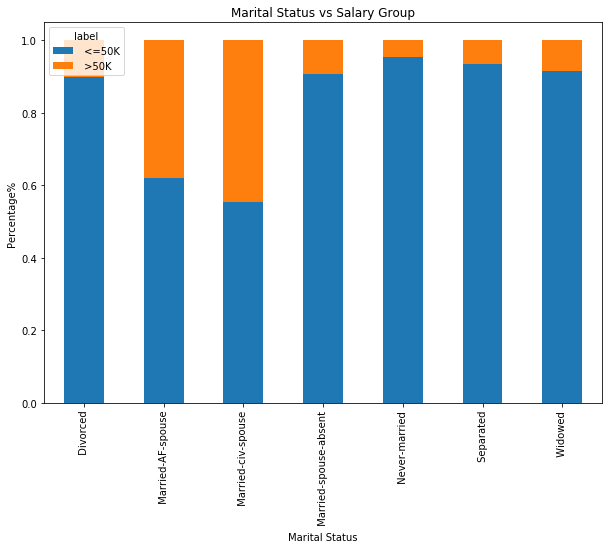

In [27]:
plot4=pivot_ms_dff_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7),title= "Marital Status vs Salary Group")
plot4.set(xlabel="Marital Status", ylabel="Percentage%")

In [28]:
#from the above it is very clear that married people are having salary more than 50K

In [29]:
pivot_occ_df = data.pivot_table(index='occupation',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)


In [30]:
pivot_occ_df_percent = pivot_occ_df.div( pivot_occ_df.iloc[:,-1], axis=0 )
pivot_occ_df_percent.iloc[:-1,:-1]

label,<=50K,>50K
occupation,,
?,0.905660,0.094340
Adm-clerical,0.863126,0.136874
Armed-Forces,0.666667,0.333333
Craft-repair,0.773724,0.226276
Exec-managerial,0.522182,0.477818
Farming-fishing,0.883893,0.116107
Handlers-cleaners,0.933398,0.066602
Machine-op-inspct,0.876903,0.123097
Other-service,0.958562,0.041438


[Text(0,0.5,'Percentage%'), Text(0.5,0,'Occupation')]

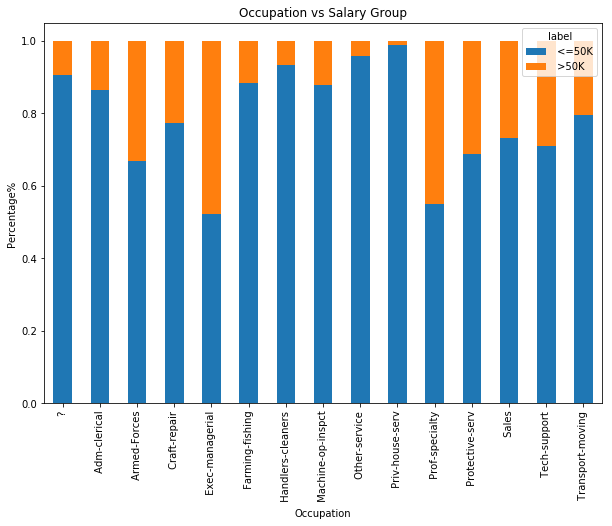

In [31]:
plot5=pivot_occ_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7),title= "Occupation vs Salary Group")
plot5.set(xlabel="Occupation", ylabel="Percentage%")

In [32]:
#From the above the Executive Managers and Professional Speciality has Salaries more than 50K

In [33]:
pivot_wc_df = data.pivot_table(index='workclass',columns='label',values='Age',aggfunc=len,fill_value=0,margins=True)

In [34]:
pivot_wc_df_percent = pivot_wc_df.div( pivot_wc_df.iloc[:,-1], axis=0 )
pivot_wc_df_percent.iloc[:-1,:-1]

label,<=50K,>50K
workclass,,
?,0.905323,0.094677
Federal-gov,0.608240,0.391760
Local-gov,0.704401,0.295599
Never-worked,1.000000,0.000000
Private,0.782133,0.217867
Self-emp-inc,0.446608,0.553392
Self-emp-not-inc,0.721129,0.278871
State-gov,0.732458,0.267542
Without-pay,0.904762,0.095238


[Text(0,0.5,'Percentage%'), Text(0.5,0,'WorkClass')]

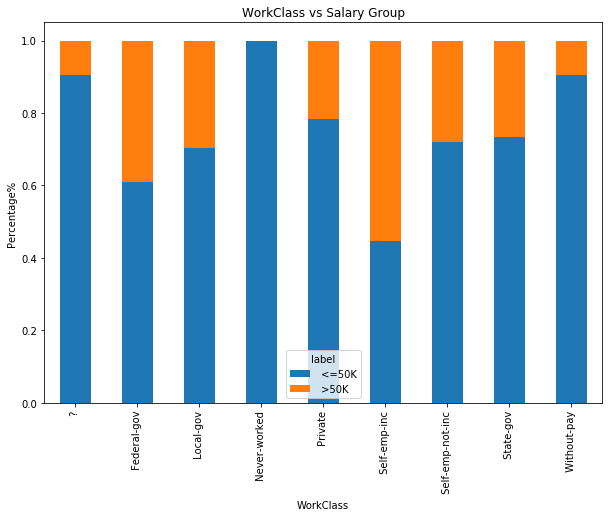

In [35]:
plot6=pivot_wc_df_percent.iloc[:-1,:-1].plot.bar(stacked=True, figsize=(10,7),title= "WorkClass vs Salary Group")
plot6.set(xlabel="WorkClass", ylabel="Percentage%")

In [36]:
#From the above it is clear that people who are self employed has salary more than 50K

In [37]:
label = data['label'] # Get the Labels
data = data.drop('label', axis =1) # Drop Label from Data
data['capitals'] = data['capital_gain']+ data['capital_loss'] # convery capital gain and capital loss to one columns
data = data.drop(['capital_gain','capital_loss'], axis =1) 

In [38]:
data.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,capitals
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,2174.0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,0.0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,0.0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,0.0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,0.0


In [39]:
#Store the categorical columns in a List
catCol = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country']

In [40]:
dataLabelEncoder = data.copy(deep=True) #DF for storing Label Encoded Data
le = LabelEncoder()
for item in catCol:#label encoding done for Categorical columns
    le.fit(dataLabelEncoder[item])
    dataLabelEncoder[item]= le.transform(dataLabelEncoder[item])

In [41]:
dataLabelEncoder.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,capitals
0,39,7,77516.0,9,13.0,4,1,1,4,1,40.0,39,2174.0
1,50,6,83311.0,9,13.0,2,4,0,4,1,13.0,39,0.0
2,38,4,215646.0,11,9.0,0,6,1,4,1,40.0,39,0.0
3,53,4,234721.0,1,7.0,2,6,0,2,1,40.0,39,0.0
4,28,4,338409.0,9,13.0,2,10,5,2,0,40.0,5,0.0


In [42]:
dataOneHotEncoding = pd.get_dummies(data) #DF for storing One-Hot Encoded data
dataOneHotEncoding.head()

,Age,fnlwgt,education_num,hours_per_week,capitals,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516.0,13.0,40.0,2174.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311.0,13.0,13.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646.0,9.0,40.0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721.0,7.0,40.0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409.0,13.0,40.0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#Split the Label Encoded Data into training and testing
x_train, x_test, y_train, y_test = train_test_split(dataLabelEncoder,label,test_size = 0.3)

In [44]:
#Split the Label Encoded Data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(dataOneHotEncoding,label,test_size = 0.3)

In [45]:
#Utility Functions

In [46]:
# Function to make predictions
def prediction(X_test, clf_object):
 
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    #print("Predicted values:")
    #print(y_pred)
    return y_pred

In [47]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
     
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
     
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
     
    print("Report : ",
    classification_report(y_test, y_pred))

In [48]:
# Function to display feature importance in a proper format
def GetTreeFeatureImportance(tree, XDataFrame ):
    feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = XDataFrame.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print("Important Features..")
    print(feature_importances)
    

# Decision Tree Models - Since the Output is Categorical


In [49]:
             ################### DECISION TREE (GINI) WITH LABEL ENCODED DATA ###################################

In [50]:
# Decision tree with gini
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [51]:
#train the model for LabelEncoded dataset
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [52]:
clf_gini.score(x_train, y_train) #Training Accuracy

0.83956828219602797

In [53]:
clf_gini.score(x_test,y_test) # Testing Accuracy

0.8398280215655497

In [54]:
# Prediction using gini
y_pred_gini = prediction(x_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Confusion Matrix:  [[10625   514]
 [ 1833  1681]]
Accuracy :  83.9828021566
Report :               precision    recall  f1-score   support

      <=50K       0.85      0.95      0.90     11139
       >50K       0.77      0.48      0.59      3514

avg / total       0.83      0.84      0.83     14653



In [55]:
#Important features Determinig the prediction
GetTreeFeatureImportance(clf_gini, x_train)

Important Features..
                importance
relationship      0.529291
capitals          0.271322
education_num     0.198059
Age               0.001328
workclass         0.000000
fnlwgt            0.000000
education         0.000000
marital_status    0.000000
occupation        0.000000
race              0.000000
sex               0.000000
hours_per_week    0.000000
native_country    0.000000


In [56]:
             ################### DECISION TREE (GINI) WITH ONE HOT ENCODED DATA ###################################

In [57]:
#train the model for OneHotEncoded dataset
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [58]:
clf_gini.score(X_train, Y_train) #Training Accuracy

0.84378016321038929

In [59]:
clf_gini.score(X_test,Y_test) # Testing Accuracy

0.84255783798539552

In [60]:
# Prediction using gini
Y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(Y_test, Y_pred_gini)

Confusion Matrix:  [[10478   702]
 [ 1605  1868]]
Accuracy :  84.2557837985
Report :               precision    recall  f1-score   support

      <=50K       0.87      0.94      0.90     11180
       >50K       0.73      0.54      0.62      3473

avg / total       0.83      0.84      0.83     14653



In [61]:
#Important features Determinig the prediction
GetTreeFeatureImportance(clf_gini, X_train)

Important Features..
                                       importance
marital_status_ Married-civ-spouse       0.533747
capitals                                 0.241242
education_num                            0.223753
Age                                      0.001258
native_country_ China                    0.000000
native_country_ Guatemala                0.000000
native_country_ Greece                   0.000000
native_country_ Germany                  0.000000
native_country_ France                   0.000000
native_country_ England                  0.000000
native_country_ El-Salvador              0.000000
native_country_ Ecuador                  0.000000
native_country_ Dominican-Republic       0.000000
native_country_ Cuba                     0.000000
native_country_ Columbia                 0.000000
native_country_ Canada                   0.000000
native_country_ Holand-Netherlands       0.000000
native_country_ Cambodia                 0.000000
native_country_ ?            

In [62]:
             ################### DECISION TREE (ENTROPY) WITH LABEL ENCODED DATA ###################################

In [63]:
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

In [64]:
#train the model
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [65]:
clf_entropy.score(x_train, y_train) #Training accuracy

0.83956828219602797

In [66]:
clf_entropy.score(x_test, y_test) #Testing accuracy

0.8398280215655497

In [67]:
# Prediction using entropy
y_pred_entropy = prediction(x_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Confusion Matrix:  [[10625   514]
 [ 1833  1681]]
Accuracy :  83.9828021566
Report :               precision    recall  f1-score   support

      <=50K       0.85      0.95      0.90     11139
       >50K       0.77      0.48      0.59      3514

avg / total       0.83      0.84      0.83     14653



In [68]:
GetTreeFeatureImportance(clf_entropy,x_test)

Important Features..
                importance
relationship      0.575535
capitals          0.273262
education_num     0.149200
Age               0.002003
workclass         0.000000
fnlwgt            0.000000
education         0.000000
marital_status    0.000000
occupation        0.000000
race              0.000000
sex               0.000000
hours_per_week    0.000000
native_country    0.000000


In [69]:
             ################### DECISION TREE (ENTROPY) WITH ONE HOT ENCODED DATA ###################################

In [70]:
#train the model
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [71]:
clf_entropy.score(X_train, Y_train) #Training accuracy

0.84378016321038929

In [72]:
clf_entropy.score(X_test, Y_test) #Testing accuracy

0.84255783798539552

In [73]:
# Prediction using entropy
Y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(Y_test, Y_pred_entropy)

Confusion Matrix:  [[10478   702]
 [ 1605  1868]]
Accuracy :  84.2557837985
Report :               precision    recall  f1-score   support

      <=50K       0.87      0.94      0.90     11180
       >50K       0.73      0.54      0.62      3473

avg / total       0.83      0.84      0.83     14653



In [74]:
GetTreeFeatureImportance(clf_entropy,X_test)

Important Features..
                                       importance
marital_status_ Married-civ-spouse       0.551902
capitals                                 0.243471
education_num                            0.202808
Age                                      0.001819
native_country_ China                    0.000000
native_country_ Guatemala                0.000000
native_country_ Greece                   0.000000
native_country_ Germany                  0.000000
native_country_ France                   0.000000
native_country_ England                  0.000000
native_country_ El-Salvador              0.000000
native_country_ Ecuador                  0.000000
native_country_ Dominican-Republic       0.000000
native_country_ Cuba                     0.000000
native_country_ Columbia                 0.000000
native_country_ Canada                   0.000000
native_country_ Holand-Netherlands       0.000000
native_country_ Cambodia                 0.000000
native_country_ ?            

# Random Forest Classifier Models

In [75]:
             ################### RANDOM FOREST WITH LABEL ENCODED DATA ###################################

In [76]:
rndTree = RandomForestClassifier(n_estimators=10, max_depth = 5)
rndTree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
rndTree.score(x_train,y_train) #Training accuracy

0.84281494047793148

In [78]:
rndTree.score(x_test,y_test) # Testing accuracy

0.8424895925748993

In [79]:
# Prediction using Random Forest
Y_pred_rndFor = prediction(x_test, rndTree)
cal_accuracy(y_test, Y_pred_rndFor)

Confusion Matrix:  [[10811   328]
 [ 1980  1534]]
Accuracy :  84.2489592575
Report :               precision    recall  f1-score   support

      <=50K       0.85      0.97      0.90     11139
       >50K       0.82      0.44      0.57      3514

avg / total       0.84      0.84      0.82     14653



In [80]:
GetTreeFeatureImportance(rndTree, x_test)

Important Features..
                importance
marital_status    0.243919
capitals          0.243019
relationship      0.176977
education_num     0.109382
Age               0.069443
hours_per_week    0.065070
education         0.037897
sex               0.027802
occupation        0.021384
workclass         0.004052
fnlwgt            0.000657
race              0.000308
native_country    0.000089


In [81]:
             ################### RANDOM FOREST WITH ONE HOT ENCODED DATA ###################################

In [82]:
rndTree = RandomForestClassifier(n_estimators=10, max_depth = 5)
rndTree.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
rndTree.score(X_train,Y_train) #Training accuracy

0.82924332387610045

In [84]:
rndTree.score(X_test,Y_test) # Testing accuracy

0.83232102641097383

In [85]:
# Prediction using Random Forest
Y_pred_rndFor = prediction(X_test, rndTree)
cal_accuracy(Y_test, Y_pred_rndFor)

Confusion Matrix:  [[10879   301]
 [ 2156  1317]]
Accuracy :  83.2321026411
Report :               precision    recall  f1-score   support

      <=50K       0.83      0.97      0.90     11180
       >50K       0.81      0.38      0.52      3473

avg / total       0.83      0.83      0.81     14653



In [86]:
GetTreeFeatureImportance(rndTree, X_test)

Important Features..
                                    importance
marital_status_ Married-civ-spouse    0.180867
relationship_ Husband                 0.144852
education_num                         0.139695
hours_per_week                        0.093322
capitals                              0.088304
Age                                   0.065042
marital_status_ Never-married         0.046248
relationship_ Own-child               0.039843
relationship_ Unmarried               0.035135
occupation_ Prof-specialty            0.025963
sex_ Male                             0.022047
relationship_ Not-in-family           0.019368
relationship_ Wife                    0.015783
education_ HS-grad                    0.014689
education_ Doctorate                  0.010953
occupation_ Exec-managerial           0.010436
workclass_ Self-emp-inc               0.008972
education_ Prof-school                0.008909
education_ Bachelors                  0.007755
occupation_ Other-service             0

# LOGISTIC REGRESSION Classification Model

In [87]:
             ####################### LOGISTIC REGRESSION WITH LABEL ENCODED DATA ###################################

In [88]:
logReg = LogisticRegression(max_iter=500)

In [89]:
logReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
logReg.score(x_train, y_train) #Training accuracy

0.78384860627687269

In [91]:
logReg.score(x_test, y_test) #Testing accuracy

0.78529993857913061

In [92]:
# Prediction using Logistic Regression
Y_pred_logreg = prediction(x_test, logReg)
cal_accuracy(y_test, Y_pred_logreg)

Confusion Matrix:  [[10675   464]
 [ 2682   832]]
Accuracy :  78.5299938579
Report :               precision    recall  f1-score   support

      <=50K       0.80      0.96      0.87     11139
       >50K       0.64      0.24      0.35      3514

avg / total       0.76      0.79      0.75     14653



In [93]:
impFeatures=pd.DataFrame({'Features' :x_test.columns,'Importance': logReg.coef_[0][:]})
impFeatures.sort_values('Importance', ascending =False)

,Features,Importance
0,Age,0.009786
10,hours_per_week,0.008918
4,education_num,0.008112
9,sex,0.002005
12,capitals,0.000361
2,fnlwgt,-0.000002
6,occupation,-0.001621
8,race,-0.004671
1,workclass,-0.005102
3,education,-0.008264


In [94]:
             ####################### LOGISTIC REGRESSION WITH ONE HOT ENCODED DATA ###################################

In [95]:
logReg = LogisticRegression(max_iter=500)

In [96]:
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
logReg.score(X_train, Y_train) #Training Score

0.79192137822106523

In [98]:
logReg.score(X_test, Y_test) # Testing Score

0.79867603903637485

In [99]:
# Prediction using Logistic Regression
Y_pred_logreg = prediction(X_test, logReg)
cal_accuracy(Y_test, Y_pred_logreg)

Confusion Matrix:  [[10944   236]
 [ 2714   759]]
Accuracy :  79.8676039036
Report :               precision    recall  f1-score   support

      <=50K       0.80      0.98      0.88     11180
       >50K       0.76      0.22      0.34      3473

avg / total       0.79      0.80      0.75     14653



In [100]:
impFeatures=pd.DataFrame({'Features' :X_test.columns,'Importance': logReg.coef_[0][:]})
impFeatures.sort_values('Importance', ascending =False)

,Features,Importance
4,capitals,3.517928e-04
32,marital_status_ Married-civ-spouse,2.836848e-04
52,relationship_ Husband,2.567081e-04
41,occupation_ Exec-managerial,8.456485e-05
23,education_ Bachelors,7.417972e-05
47,occupation_ Prof-specialty,6.640636e-05
26,education_ Masters,4.905769e-05
10,workclass_ Self-emp-inc,3.131034e-05
57,relationship_ Wife,2.994068e-05
64,sex_ Male,2.886093e-05


# Problem Statement


# Problem 1:
# Prediction task is to determine whether a person makes over 50K a year.

# Problem 2:
# Which factors are important

# Problem 3:
# Which algorithms are best for this dataset